In [0]:
!unrar x train.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from train.rar


Would you like to replace the existing file train/mask/0.jpg
 42994 bytes, modified on 2020-05-03 08:55
with a new one
 42994 bytes, modified on 2020-05-03 08:55

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Q

Program aborted


In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os
import cv2

In [0]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images('train'))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the input image (224x224) and preprocess it
    image = cv2.imread(imagePath)
    image = cv2.resize(image,(224,224))
    #image = preprocess_input(image)
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

[INFO] loading images...


In [0]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.40, stratify=labels, random_state=42)

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range = 40,shear_range = 0.3,zoom_range = 0.3,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255,rotation_range = 40,shear_range = 0.3,zoom_range = 0.3,horizontal_flip = True)

train_data = train_datagen.flow(trainX,trainY,batch_size = 32)
test_data = test_datagen.flow(testX,testY,batch_size = 32)


In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
modelVGG = Sequential()
VGG = VGG16(include_top = False,input_shape = (224,224,3))

for i in VGG.layers:
    i.trainable = False
  

In [0]:
modelVGG.add(VGG)
modelVGG.add(Flatten())
modelVGG.add(Dense(512,activation = 'relu'))
modelVGG.add(Dense(2,activation = 'sigmoid'))

modelVGG.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

H = modelVGG.fit(train_data,validation_data = test_data,epochs = 25,steps_per_epoch=30,validation_steps = 15)

Epoch 1/25
30/30 [==============================] - 22s 720ms/step - loss: 1.1199 - accuracy: 0.8000 - val_loss: 0.3860 - val_accuracy: 0.8313
Epoch 2/25
30/30 [==============================] - 21s 716ms/step - loss: 0.2796 - accuracy: 0.8781 - val_loss: 0.2168 - val_accuracy: 0.9229
Epoch 3/25
30/30 [==============================] - 21s 711ms/step - loss: 0.2191 - accuracy: 0.9042 - val_loss: 0.2076 - val_accuracy: 0.9104
Epoch 4/25
30/30 [==============================] - 22s 719ms/step - loss: 0.1872 - accuracy: 0.9187 - val_loss: 0.1683 - val_accuracy: 0.9458
Epoch 5/25
30/30 [==============================] - 21s 714ms/step - loss: 0.1907 - accuracy: 0.9146 - val_loss: 0.1670 - val_accuracy: 0.9312
Epoch 6/25
30/30 [==============================] - 21s 707ms/step - loss: 0.2322 - accuracy: 0.8865 - val_loss: 0.1765 - val_accuracy: 0.9542
Epoch 7/25
30/30 [==============================] - 21s 715ms/step - loss: 0.1857 - accuracy: 0.9208 - val_loss: 0.1196 - val_accuracy: 0.9646

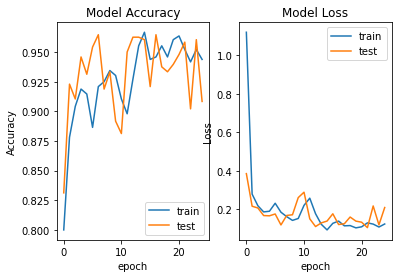

In [0]:
%matplotlib inline 
plt.subplot(1,2,1)
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.subplot(1,2,2)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.savefig('model_history.jpg')

In [0]:
modelVGG.save('j.h5')

In [0]:
modelVGG

In [0]:
image = cv2.imread('testImage.jpg')
image = cv2.resize(image,(224,224))


In [0]:
image = image * 1./255

In [0]:
image = image.reshape(1,224,224,3)

In [0]:
modelVGG.predict(image).argmax()

1

In [0]:
!cp /content/j.h5  /content/drive/My\ Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
